#Linear regression
in linear regression we try to find the relationship between a set of independant variables and dependant variables. 

For example we can find the line of best fit between the height of a child and the age of a child. To do this, we make use of sklearn's linear regression class which minimises the sum of squares errors 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn   # This imports the scikit-learn library


In [2]:
np.random.seed(0)
n=20   # Number of data points
x=np.linspace(0, 10, n)
y=x*2 + 1 + 1*np.random.randn(n) # Standard deviation 1
print(x)
print(y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.76405235  2.45278879  4.08400114  6.39878794  7.07808431  5.28588001
  8.26587789  8.21706384  9.31783378 10.88428271 11.67035936 14.03322088
 14.39261667 14.80588554 16.18070534 17.12314801 19.33618434 18.68957858
 20.26043612 20.14590426]


In [3]:
# now we import the linear regression class from sklearn
from sklearn.linear_model import LinearRegression

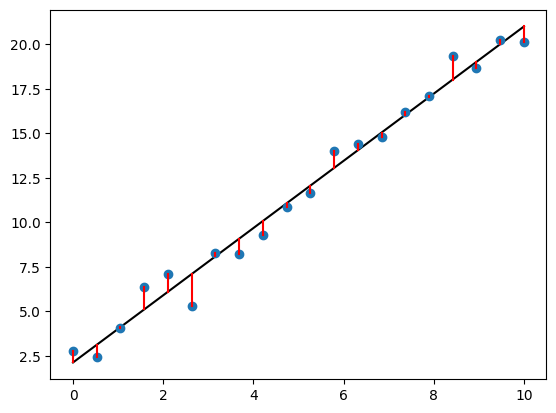

In [4]:
# and fit a line trhough the data points (x,y)
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
xfit=np.linspace(0,10,100)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(x,y, 'o')
# The following will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

In the above graph the sum of squared errors is represented by the squares the lenghts of hte red lines. 

The estimated values y[i] hat are denoted by yfit[i] in the above code.

In [5]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [1.88627741] 2.1379475205341354
Coefficient: 1.8862774144823005
Intercept: 2.1379475205341354


### Multiple independant variables 

In the previous example we only had 1 independant vartiable, where computational linear regression really has its strength is when measuing the relationshipi between multipul variables 

In [6]:
sample1=np.array([1,2,3])   # The three explanatory variables have values 1, 2, and 3, respectively
sample2=np.array([4,5,6])   # Another example of values of explanatory variables
sample3=np.array([7,8,10])   # ...
y=np.array([15,39,66]) + np.random.randn(3)   # For values 1,2, and 3 of explanatory variables, the value y=15 was observed, and so on.

In [7]:
# now we fit this data t oa linear model
model2=LinearRegression(fit_intercept=False)
x=np.vstack([sample1,sample2,sample3])
model2.fit(x, y)
model2.coef_, model2.intercept_

(array([5.69493795e+00, 3.36972233e+00, 4.20919214e-03]), 0.0)

In [9]:
b=model2.coef_[:, np.newaxis]
print("x:\n", x)
print("b:\n", b)
print("y:\n", y[:, np.newaxis])
print("product:\n", np.matmul(x, b))

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b:
 [[5.69493795e+00]
 [3.36972233e+00]
 [4.20919214e-03]]
y:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]
product:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]


### Polynomial regression 

in addition to fiting a straight line of best fit, you can also fit a polynomial equation to show a relationship between data 

Coefficients: [-36.65414588 -20.17228669   0.15359003]
Intercept: -167.16046606185046


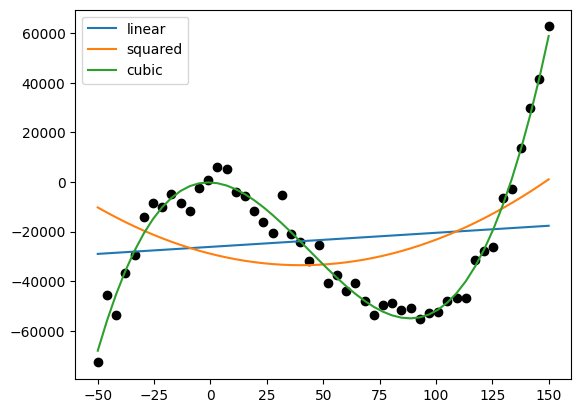

In [10]:
x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")
model_linear=LinearRegression(fit_intercept=True)
model_squared=LinearRegression(fit_intercept=True)
model_cubic=LinearRegression(fit_intercept=True)
x2=x**2
x3=x**3
model_linear.fit(np.vstack([x]).T, y)
model_squared.fit(np.vstack([x,x2]).T, y)
model_cubic.fit(np.vstack([x,x2,x3]).T, y)
xf=np.linspace(-50,150, 50)
yf_linear=model_linear.predict(np.vstack([x]).T)
yf_squared=model_squared.predict(np.vstack([x,x2]).T)
yf_cubic=model_cubic.predict(np.vstack([x,x2,x3]).T)
plt.plot(xf,yf_linear, label="linear")
plt.plot(xf,yf_squared, label="squared")
plt.plot(xf,yf_cubic, label="cubic")
plt.legend()
print("Coefficients:", model_cubic.coef_)
print("Intercept:", model_cubic.intercept_)